In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [112]:
DATA_FILE = r'..\Data\rm_working_files\right_move_data_final2.csv'
df = pd.read_csv(DATA_FILE)

In [113]:
feature_cols = ['bedrooms','propertyType','bourough','outdoor space','nearest stattion','number of stops within 2kms',
                'population', 'median wage', 'total number of schools_y', 'percentage attedning private school']

In [114]:
X = pd.get_dummies(data=df[feature_cols], drop_first=True)
y = df.price

In [89]:
rfreg = RandomForestRegressor(n_estimators=150, max_features=5, oob_score=True, random_state=1)
rfreg.fit(X, y)

RandomForestRegressor(max_features=5, n_estimators=150, oob_score=True,
                      random_state=1)

In [90]:
print((rfreg.oob_score_))

0.7052903241626247


In [91]:
scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

131402.52616616897

In [92]:
X.shape

(12390, 48)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 89)

In [116]:
RFR1 = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [100],
              'max_features': [7,8,9,10],
              'max_depth': [3,4,5,6],
              'min_samples_split':[100]
             }
scoring='r2'
grid_RFR = GridSearchCV(estimator=RFR1, param_grid=param_grid, scoring=scoring, n_jobs=1, cv=5,verbose=1)
grid_RFR.fit(X_train,y_train)
print('Random Forest regression...')
print('Best Params:')
print(grid_RFR.best_params_) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Random Forest regression...
Best Params:
{'max_depth': 6, 'max_features': 10, 'min_samples_split': 100, 'n_estimators': 100}


In [123]:
RFR_tuned=RandomForestRegressor(n_estimators=100,max_depth= 6, max_features=8, min_samples_split=100,random_state=89, oob_score=True)

In [124]:
RFR_tuned.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, max_features=8, min_samples_split=100,
                      oob_score=True, random_state=89)

In [125]:
y_predrfr_tuned=RFR_tuned.predict(X_test)

In [129]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predrfr_tuned))

print("Mean absolute Error: %.2f"% metrics.mean_absolute_error(y_test, y_predrfr_tuned))

print("Root Mean square Error: %.2f"% np.sqrt(mean_squared_error(y_test, y_predrfr_tuned)))

print('Test Variance score: %.2f' % r2_score(y_test, y_predrfr_tuned))
print("Model Score for Training data: {}".format(RFR_tuned.score(X_train,y_train)))
print("Model Score for Testing data: {}".format(r2_score(y_test,y_predrfr_tuned)))
print('R2(Cross_Val_Score): ',np.sqrt(cross_val_score(RFR_tuned,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')))
print('R2(mean of fold of cross_val_score): ',np.sqrt(cross_val_score(RFR_tuned,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')).mean())

Mean squared error: 18719994530.26
Mean absolute Error: 110079.62
Root Mean square Error: 136821.03
Test Variance score: 0.56
Model Score for Training data: 0.5806162803273975
Model Score for Testing data: 0.5618413368668419
R2(Cross_Val_Score):  [0.76016679 0.74588193 0.75042763 0.75827558 0.75616862]
R2(mean of fold of cross_val_score):  0.7541841090405035


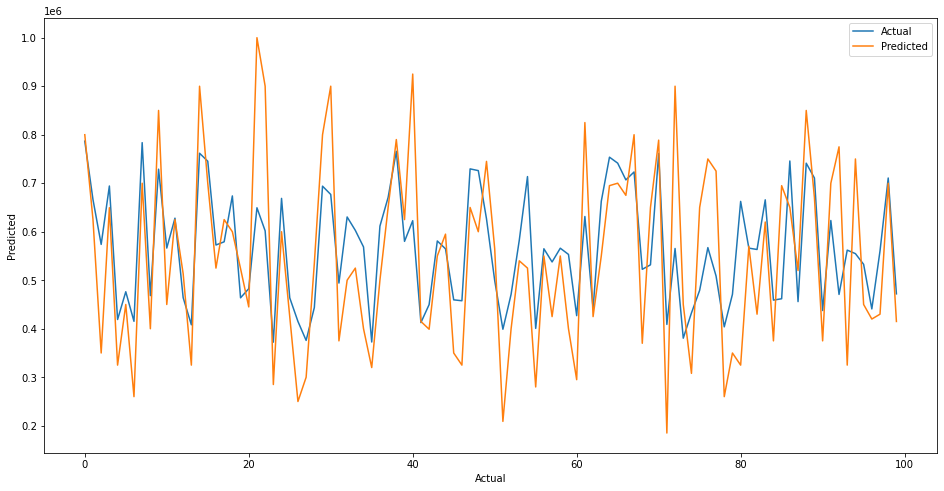

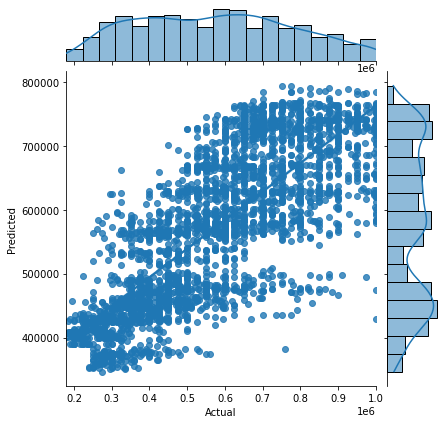

In [131]:
test = pd.DataFrame({'Predicted':y_predrfr_tuned,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [134]:
# Lets see the best parameters from ensemble method using GridSearch:
gbr=GradientBoostingRegressor(random_state=42)
param_grid={
    'n_estimators':[100,500],
    'max_depth':range(4,10,1),
    'max_features':[6,7,9,10],
    'min_samples_split':[100,200]  
}
scoring='r2'
grid_gbr=GridSearchCV(gbr,param_grid,scoring=scoring,n_jobs=2,cv=3,verbose=1)
grid_gbr.fit(X_train,y_train)
print(grid_gbr.best_params_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
{'max_depth': 7, 'max_features': 7, 'min_samples_split': 100, 'n_estimators': 500}


In [135]:
GBR_tuned=GradientBoostingRegressor(n_estimators=100,max_depth= 8,max_features=6, min_samples_split=100,learning_rate=0.1,subsample=0.75,random_state=42)


In [136]:
GBR_tuned.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=8, max_features=6, min_samples_split=100,
                          random_state=42, subsample=0.75)

In [156]:
y_predgbr_tuned=GBR_tuned.predict(X_test)

In [157]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predgbr_tuned))

print("Mean absolute Error: %.2f"% metrics.mean_absolute_error(y_test, y_predgbr_tuned))

print("Root Mean square Error: %.2f"% np.sqrt(mean_squared_error(y_test, y_predgbr_tuned)))

print('Test Variance score: %.2f' % r2_score(y_test, y_predgbr_tuned))
print("Model Score for Training data: {}".format(GBR_tuned.score(X_train,y_train)))
print("Model Score for Testing data: {}".format(r2_score(y_test,y_predgbr_tuned)))
print('R2(Cross_Val_Score): ',np.sqrt(cross_val_score(GBR_tuned,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')))
print('R2(mean of fold of cross_val_score): ',np.sqrt(cross_val_score(GBR_tuned,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')).mean())

Mean squared error: 12645741804.85
Mean absolute Error: 86589.33
Root Mean square Error: 112453.29
Test Variance score: 0.70
Model Score for Training data: 0.7508391859606994
Model Score for Testing data: 0.7040148000799811
R2(Cross_Val_Score):  [0.84800254 0.85133315 0.84395698 0.84582639 0.8392933 ]
R2(mean of fold of cross_val_score):  0.8456824744012105


In [158]:
#This model is better than other models performed above.

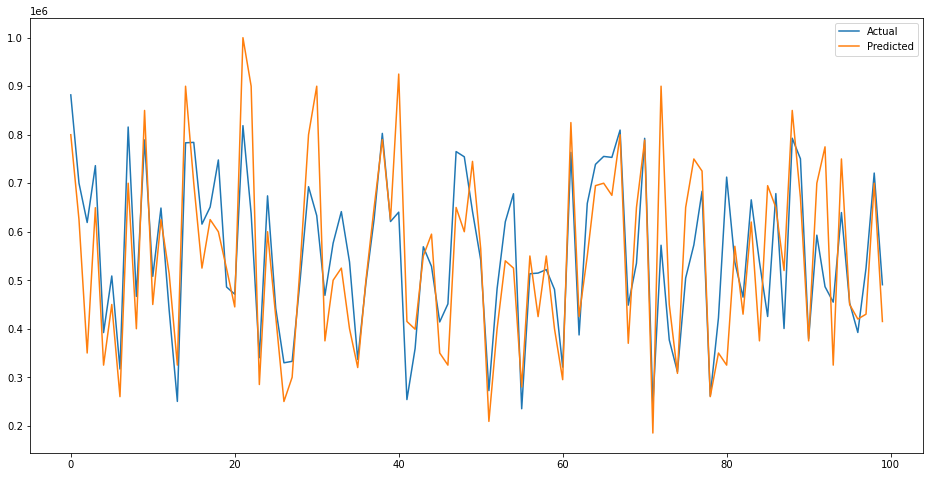

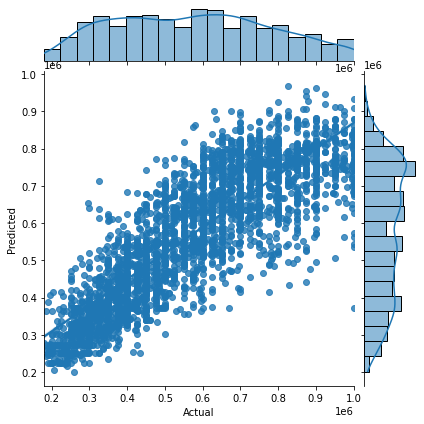

In [159]:
test = pd.DataFrame({'Predicted':y_predgbr_tuned,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

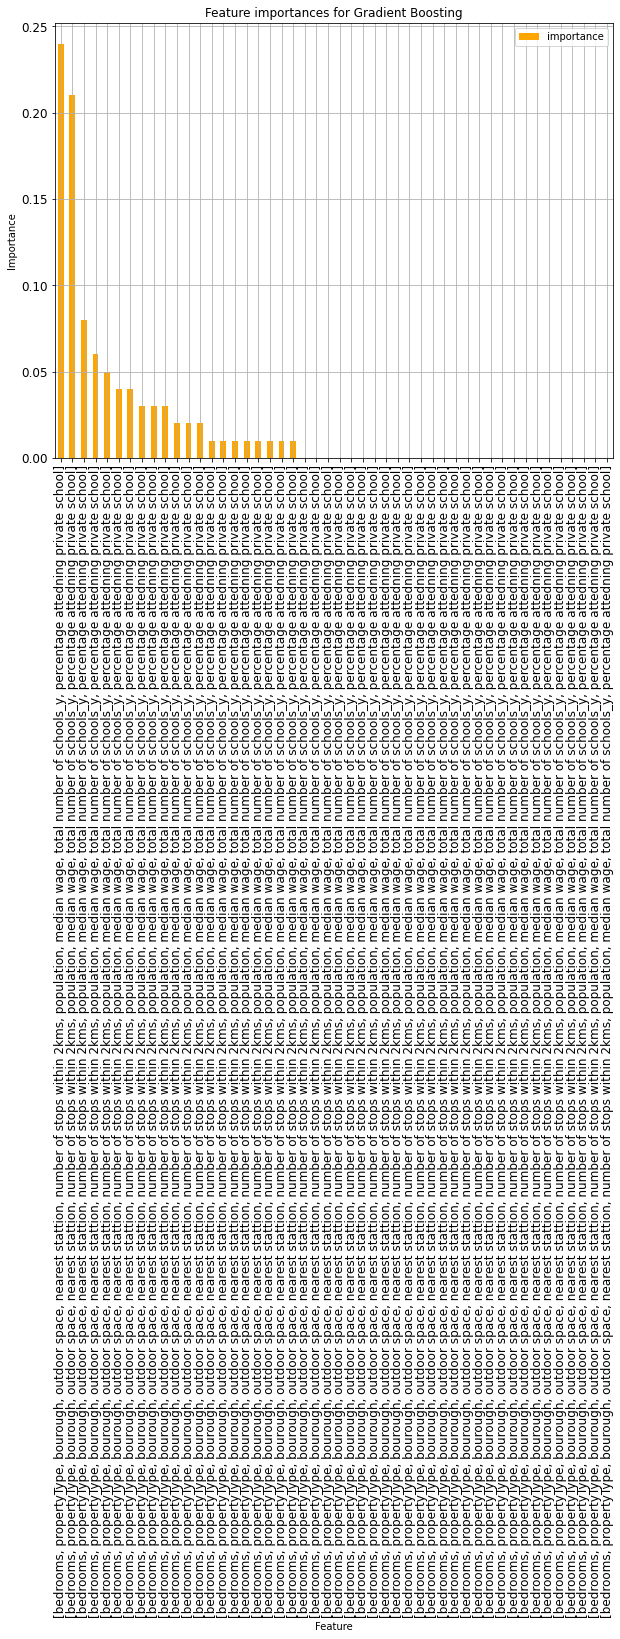

In [146]:
ax = df_feature_importance.plot(kind='bar', 
        x='feature', 
        y='importance',
        figsize=(10,8),
        title= 'Feature importances for Gradient Boosting',
        grid=True,
        legend=True,
        fontsize = 12,                        
        color='orange',    
       );
# Set the x-axis label
ax.set_xlabel("Feature")

# Set the y-axis label
ax.set_ylabel("Importance");